<a href="https://colab.research.google.com/github/TheVille415/deep_learning/blob/master/Intensive_Retake_1point2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

A Single Neuron

In [ ]:
# from tensorflow import keras
# from tensorflow.keras import layers

# # Create a network with 1 linear unit
# # input_shape = what we are looking for - total columns
# model = keras.Sequential([
#     layers.Dense(units=1, input_shape=[3])
# ])

Deep Neural Networks:
<br>
activation function = some function we use for each layers output
we will be using rectified linear unit or ReLU

---



In [ ]:
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([
    # the hidden ReLU layers
    layers.Dense(512, activation='relu', input_shape=[11]),
    layers.Dense(512, activation='relu'),
    layers.Dense(512, activation='relu'),
    # the linear output layer 
    layers.Dense(units=1),
])

# Stochastic Gradient Descent: The loss function
<br>
A common loss function for regression problems is the mean absolute error or MAE. For each prediction y_pred, MAE measures the disparity from the true target y_true by an absolute difference abs(y_true - y_pred).



# Stochastic Gradient Descent: The Optimizer
<br>
The optimizer is an algorithm that adjusts the weights to minimize the loss. Each iteration's sample of training data is called a minibatch (or often just "batch"), while a complete round of the training data is called an epoch. The number of epochs you train for is how many times the network will see each training example.

# Learning rate and batch size:

The size of these shifts is determined by the learning rate. A smaller learning rate means the network needs to see more minibatches before its weights converge to their best values.

**Adam** is an SGD algorithm that has an adaptive learning rate that makes it suitable for most problems without any parameter tuning (it is "self tuning", in a sense). Adam is a great general-purpose optimizer.

Importing Kaggle Redwine Quality Dataset

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
wine_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/winequality-red.csv')
wine_df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [ ]:
# creating and training the data
df_train = wine_df.sample(frac=0.7, random_state=0)
df_valid = wine_df.drop(df_train.index)
display(df_train.head(4))

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1109,10.8,0.470,0.43,2.10,0.171,27.0,66.0,0.99820,3.17,0.76,10.8,6
1032,8.1,0.820,0.00,4.10,0.095,5.0,14.0,0.99854,3.36,0.53,9.6,5
1002,9.1,0.290,0.33,2.05,0.063,13.0,27.0,0.99516,3.26,0.84,11.7,7
487,10.2,0.645,0.36,1.80,0.053,5.0,14.0,0.99820,3.17,0.42,10.0,6


In [ ]:
# Scaling the data [0,1]
max_ = df_train.max(axis=0)
min_ = df_train.min(axis=0)
df_train = (df_train - min_) / (max_ - min_)
df_valid = (df_valid - min_) / (max_ - min_)

In [ ]:
# Splitting features and target
X_train = df_train.drop('quality', axis=1)
X_valid = df_valid.drop('quality', axis=1)
y_train = df_train['quality']
y_valid = df_valid['quality']

In [ ]:
print(X_train.shape)
# after printing we see we have 11 columns or 11 inputs

(1119, 11)


In [ ]:
model.compile(
    optimizer="adam",
    loss="mae",
)

In [ ]:
# time to start training
history = model.fit(
    X_train, y_train,
    validation_data=(X_valid, y_valid),
    batch_size=256,
    epochs=200,
)

Epoch 1/200
5/5 [==============================] - 0s 40ms/step - loss: 0.0863 - val_loss: 0.0948
Epoch 2/200
5/5 [==============================] - 0s 31ms/step - loss: 0.0865 - val_loss: 0.1010
Epoch 3/200
5/5 [==============================] - 0s 30ms/step - loss: 0.0887 - val_loss: 0.0987
Epoch 4/200
5/5 [==============================] - 0s 28ms/step - loss: 0.0887 - val_loss: 0.0932
Epoch 5/200
5/5 [==============================] - 0s 29ms/step - loss: 0.0865 - val_loss: 0.0941
Epoch 6/200
5/5 [==============================] - 0s 28ms/step - loss: 0.0846 - val_loss: 0.0926
Epoch 7/200
5/5 [==============================] - 0s 27ms/step - loss: 0.0832 - val_loss: 0.0937
Epoch 8/200
5/5 [==============================] - 0s 28ms/step - loss: 0.0846 - val_loss: 0.0930
Epoch 9/200
5/5 [==============================] - 0s 28ms/step - loss: 0.0837 - val_loss: 0.0951
Epoch 10/200
5/5 [==============================] - 0s 32ms/step - loss: 0.0842 - val_loss: 0.0959
Epoch 11/200
5/5 [=

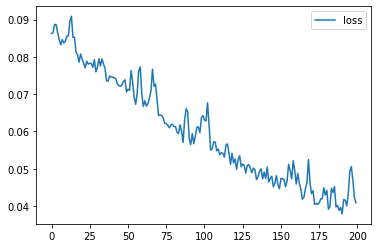

In [ ]:
# convert the training history to a dataframe
history_df = pd.DataFrame(history.history)
history_df.loc[0:, ['loss']].plot();